In [1]:
import gymnasium as gym
import numpy as np
from traffic_env import TrafficEnvironment

🚦 Initial Traffic Light Simulation 🚦
State Format: [Cars North, Cars South, Cars East, Cars West]
Actions: 0 = Keep Current Light, 1 = Switch Light
Initial state: [6 1 2 5] (NS Green, EW Red)
Step 1:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [5 0 2 7]
  🎯 Reward (Cars Passed): 2
----------------------------------------
Step 2:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [4 2 4 7]
  🎯 Reward (Cars Passed): 3
----------------------------------------
Step 3:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [2 2 4 8]
  🎯 Reward (Cars Passed): 5
----------------------------------------
Step 4:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [2 0 4 8]
  🎯 Reward (Cars Passed): 4
----------------------------------------
Step 5:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [1 1 5 8]
  🎯 Reward (Cars Passed): 2
------------------------

## Ex1: Découverte de l'environnement

In [4]:
env = TrafficEnvironment()


In [6]:
state = env.reset()

In [8]:
for _ in range(10):
    action = 0  # Garder le feu tel qu'il est
    next_state, reward = env.step(action)
    print(f"État : {next_state}, Récompense : {reward}")


État : [ 1  5 10  4], Récompense : 6
État : [ 2  4 11  6], Récompense : 2
État : [ 0  2 13  7], Récompense : 4
État : [ 1  2 13  9], Récompense : 2
État : [ 1  0 15  9], Récompense : 3
État : [ 2  2 17 11], Récompense : 1
État : [ 2  1 18 13], Récompense : 4
État : [ 0  2 18 13], Récompense : 2
État : [ 1  2 19 15], Récompense : 1
État : [ 1  2 19 16], Récompense : 3


In [10]:
print("État initial :", state)
print("Action initial :", action)

État initial : [ 1  2 19 16]
Action initial : 0


In [12]:
q_table = np.zeros((10, 10, 10, 10, 2))
print(q_table[3, 5, 2, 7])

[0. 0.]


## Ex2: Implémentation de Q-Learning

In [37]:
nb_etats = 10  
nb_actions = 2  # 0 = garder le feu, 1 = changer le feu
alpha = 0.1  
gamma = 0.9  
epsilon = 1.0  
epsilon_decay = 0.99  

env = TrafficEnvironment()
q_table = np.zeros((nb_etats, nb_actions))  


def get_state_index(state):
    """Transforme l'état en un indice unique si nécessaire."""
    return min(sum(state) // len(state), nb_etats - 1)  

learn_rewards = []

for episode in range(1000):  
    state = env.reset()
    state_index = get_state_index(state)
    total_reward = 0

    for _ in range(50):
        # Choix de l'action (exploration vs exploitation)
        if np.random.rand() < epsilon:
            action = np.random.choice(nb_actions)
        else:
            action = np.argmax(q_table[state_index])

        
        next_state, reward = env.step(action)
        next_state_index = get_state_index(next_state)
        q_table[state_index, action] = q_table[state_index, action] + alpha * (reward + gamma * np.max(q_table[next_state_index]) - q_table[state_index, action])

        state_index = next_state_index
        total_reward += reward

    learn_rewards.append(total_reward)

    epsilon *= epsilon_decay

print("Apprentissage terminé ! ")
print("Q-Table finale :")
print(q_table)

Apprentissage terminé ! 
Q-Table finale :
[[29.00083263 31.04265805]
 [30.56638144 33.52159522]
 [32.30222377 34.60612189]
 [33.5587298  36.14570289]
 [34.5025764  36.80604481]
 [33.68000781 37.42379265]
 [17.13410324 38.19104223]
 [37.47663464 15.21294273]
 [ 0.         21.55383555]
 [ 0.          0.        ]]


## Ex3 : Implémentation de SARSA

In [39]:
nb_etats = 10  
nb_actions = 2 
alpha = 0.1  
gamma = 0.9  
epsilon = 1.0 
epsilon_decay = 0.99  


env = TrafficEnvironment()
q_table= np.zeros((nb_etats, nb_actions))  


def get_state_index(state):
    return min(sum(state) // len(state), nb_etats - 1)  

sarsa_rewards = []

for episode in range(1000):  
    state = env.reset()
    state_index = get_state_index(state)
    total_reward = 0
    action = np.random.choice(nb_actions) if np.random.rand() < epsilon else np.argmax(q_table[state_index])

    for _ in range(50):
        next_state, reward = env.step(action)
        next_state_index = get_state_index(next_state)
        next_action = np.random.choice(nb_actions) if np.random.rand() < epsilon else np.argmax(q_table[next_state_index])
        total_reward += reward  # Ajouter la récompense reçue
        
        q_table[state_index, action] += alpha * (reward + gamma * q_table[next_state_index, next_action] - q_table[state_index, action])
        
        state_index, action = next_state_index, next_action

    sarsa_rewards.append(total_reward)
    epsilon *= epsilon_decay

print("Apprentissage SARSA terminé !")
print("Q-Table finale :")
print(q_table)

Apprentissage SARSA terminé !
Q-Table finale :
[[28.75351155 30.35578453]
 [29.9378911  31.99060495]
 [31.69917224 33.79513591]
 [33.84883372 34.89370625]
 [34.65932473 35.72621799]
 [29.09848028 37.20585031]
 [19.34236337 37.61520007]
 [ 7.04287018 38.32009609]
 [21.97727005  0.        ]
 [ 0.          0.        ]]


## Ex4 : Analyse et Visualisation des résultats

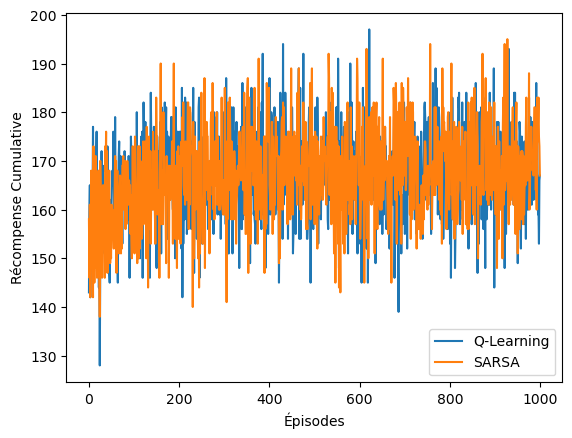

In [41]:
plt.plot(sarsa_rewards, label="Q-Learning")
plt.plot(learn_rewards, label="SARSA")
plt.xlabel("Épisodes")
plt.ylabel("Récompense Cumulative")
plt.legend()
plt.show()

In [ ]:
# L'algorithme Q-Learning apprend plus vite que SARSA